In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/diabetes_.csv")

missing_info = data.isnull().sum() / len(data) * 100
# Handle missing values
for column in data.columns:
  if missing_info[column] > 10: # If more than 10% missing
    data[column].fillna(data[column].mean(), inplace=True)
else: # If less than 10% missing
  data.dropna(subset=[column], inplace=True)

df = pd.DataFrame(data)

print(df.head())
print(df.info())
print(df.describe())
print(df.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [40]:
df.columns
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [44]:
x = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [54]:
def train_test_split_scratch(x,y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(len(x))
  np.random.shuffle(indices)

  split = int (len(x)* test_size)
  test_idx = indices[:split]
  train_idx = indices[split:]
  x_test , y_test = x[test_idx] ,y[test_idx]
  x_train , y_train = x[train_idx] ,y[train_idx]

  return x_train, x_test, y_train, y_test

In [55]:
x_train, x_test, y_train, y_test = train_test_split_scratch(x, y)

In [59]:
def euclidean_distance(a, b):
  if a.shape != b.shape:
    raise ValueError("Points must have the same dimension.")
  return np.sqrt(np.sum((a - b) ** 2))

In [62]:
def knn_predict_single(query, x_train, y_train, k=3):
  distance = [euclidean_distance(query, x )for x in x_train]
  nearest_indices = np.argsort(distance)[:k]
  nearest_labels = y_train [nearest_indices]

  return np.bincount(nearest_labels).argmax()

In [63]:
def knn_predict(x_test, x_train, y_test, k=3):
  return np.array([knn_predict_single(x,x_train,y_train, k)for x in x_test])

In [64]:
def compute_accuracy(y_true, y_pred):
  return (np.sum(y_true == y_pred) / len(y_true)) * 100

In [67]:
predictions = knn_predict(x_test, x_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)


print(f"Accuracy (Unscaled Data): {accuracy:.2f}%")

Accuracy (Unscaled Data): 67.39%


In [72]:
def min_max_scaling(x):
  return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

X_scaled = min_max_scaling(x)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

In [73]:
scaled_predictions = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
scaled_accuracy = compute_accuracy(y_test_s, scaled_predictions)


print(f"Accuracy (Scaled Data): {scaled_accuracy:.2f}%")

Accuracy (Scaled Data): 69.13%


In [79]:

k_values = range(1, 16)
acc_original = []
acc_scaled = []

for k in k_values:
  pred_o = knn_predict(x_test, x_train, y_train, k)
  acc_original.append(compute_accuracy(y_test, pred_o))
  pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
  acc_scaled.append(compute_accuracy(y_test_s, pred_s))
print(acc_original)
print(acc_original)

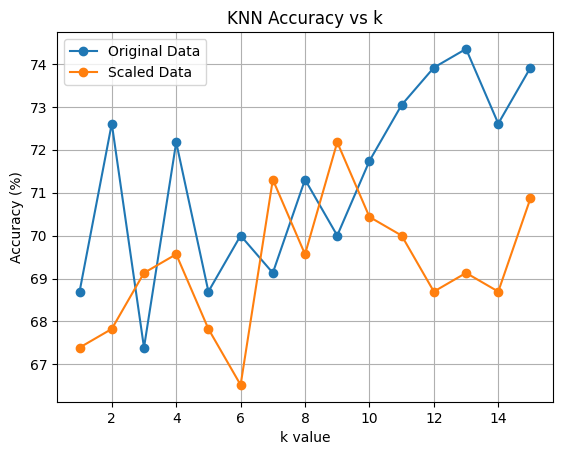

In [83]:
plt.plot(k_values, acc_original, marker='o', label='Original Data')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled Data')
plt.xlabel('k value')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy vs k')
plt.legend()
plt.grid(True)
plt.show()